In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from collections import Counter

In [ ]:
df=pd.read_csv('tested.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
df['Age'].fillna((df['Age'].median()),inplace=True)

df['Fare'].fillna((df['Fare'].mean()),inplace=True)

In [ ]:
df['Cabin'].fillna((df['Cabin'].mode()),inplace=True)

In [ ]:
df.drop(['Cabin'], axis=1, inplace=True)
df.drop(['Name'], axis=1, inplace=True)
df.drop(['PassengerId'], axis=1, inplace=True)
df.drop(['Ticket'], axis=1, inplace=True)
df.drop(['Fare'], axis=1, inplace=True)
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [ ]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [ ]:
le=LabelEncoder()

#encoding sex
x['Sex']=le.fit_transform(x['Sex'])
print(x['Sex'])#male 1 female 0

0      1
1      0
2      1
3      1
4      0
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 418, dtype: int64


In [ ]:
le1=LabelEncoder

#encoding Embarked
x['Embarked']=le.fit_transform(x['Embarked'])
print(x['Embarked']) #Q=1, S=2, C=0

0      1
1      2
2      1
3      2
4      2
      ..
413    2
414    0
415    2
416    2
417    0
Name: Embarked, Length: 418, dtype: int64


In [ ]:
y.value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=0)
print("before:")
print(y.value_counts())
x_over, y_over = ros.fit_resample(x,y)
print("after:")
print(y_over.value_counts())
y=y_over
y.value_counts()

before:
0    266
1    152
Name: Survived, dtype: int64
after:
0    266
1    266
Name: Survived, dtype: int64


0    266
1    266
Name: Survived, dtype: int64

In [ ]:
x=x_over
x

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,34.5,0,0,1
1,3,0,47.0,1,0,2
2,2,1,62.0,0,0,1
3,3,1,27.0,0,0,2
4,3,0,22.0,1,1,2
...,...,...,...,...,...,...
527,3,0,27.0,0,0,2
528,3,0,27.0,0,0,1
529,3,0,23.0,0,0,2
530,1,0,27.0,1,2,2


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0,test_size=0.3)

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = log_reg.predict(x_test)
print(accuracy_score(y_test,y_pred))


1.0


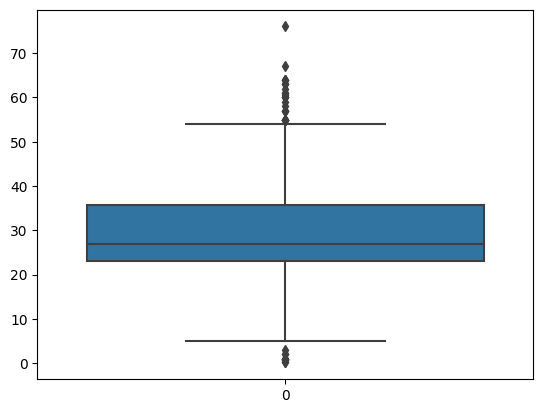

In [ ]:
#handling outliers
sns.boxplot(df['Age']);

In [ ]:
#dealing with outliers
print(df['Age'])
Q1=df['Age'].quantile(0.25)
Q3=df['Age'].quantile(0.75)

IQR=Q3-Q1
print(IQR)

upper=Q3+1.5*IQR
lower=Q1-1.5*IQR

print(upper)
print(lower)

out1=df[df['Age']<lower].values
out2=df[df['Age']>upper].values


0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413    27.0
414    39.0
415    38.5
416    27.0
417    27.0
Name: Age, Length: 418, dtype: float64
12.75
54.875
3.875


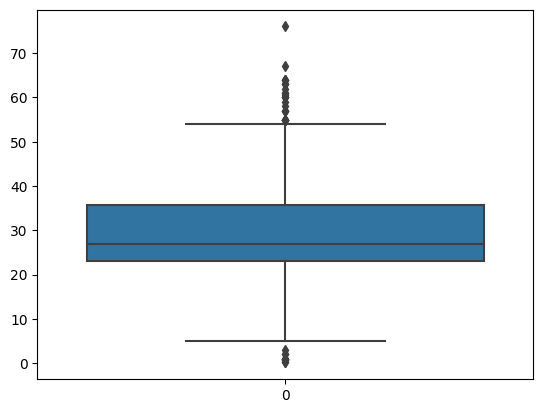

In [ ]:
print(np.where(df_diabetics['RM']>0.12))